In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from xgboost_regressor import XGBoostRegressor
from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_name = 'dataframe_alpha.xlsx'
file_path_CN = f"{path}{file_name}"
file_path_AD = f'{path}df_AD_filtrado.xlsx'
file_path_FTD = f'{path}df_FTD_filtrado.xlsx'
file_path_MCI = f'{path}df_MCI_filtrado.xlsx'
file_path_PD = f'{path}df_PD_filtrado.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_CN_filtrado = df_CN[df_CN['Age'] > 40].reset_index(drop=True)

df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado=pd.read_excel(file_path_FTD)
df_MCI_filtrado=pd.read_excel(file_path_MCI)
df_PD_filtrado=pd.read_excel(file_path_PD)

X_CN = df_CN_filtrado.drop(columns=["Unnamed: 0", "Age"])
X_AD = df_AD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_FTD = df_FTD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_MCI = df_MCI_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_PD = df_PD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])

# Combina X_CN y X_AD
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)

# Inicializa y ajusta el MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_combined)

# Aplica la transformación a X_CN y X_AD
X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

# Opcional: convierte los resultados escalados de nuevo a DataFrames
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

y_CN = df_CN_filtrado["Age"]
y_AD = df_AD_filtrado["Age"]
y_FTD = df_FTD_filtrado["Age"]
y_MCI = df_MCI_filtrado["Age"]
y_PD = df_PD_filtrado["Age"]



In [6]:
xgb_model = XGBoostRegressor()
xgb_model.set_data(X_CN_scaled,y_CN,preprocess=False)
Plotters = Plotter()

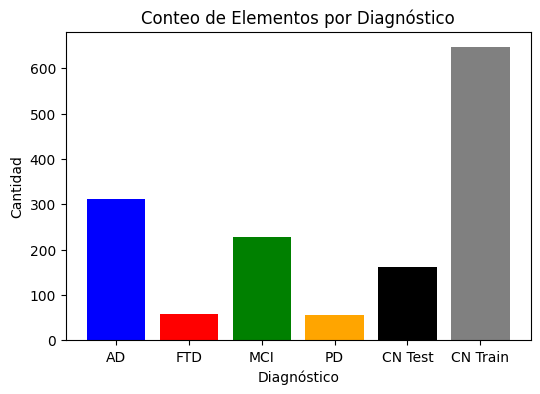

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los DataFrames
df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado = pd.read_excel(file_path_FTD)
df_MCI_filtrado = pd.read_excel(file_path_MCI)
df_PD_filtrado = pd.read_excel(file_path_PD)
df_control_train = xgb_model.X_train  # Grupo de control para entrenamiento
df_control_test = xgb_model.X_test  # Grupo de control para prueba

# Crear un nuevo DataFrame con el conteo de elementos por diagnóstico
data = {
    'Diagnóstico': ['AD', 'FTD', 'MCI', 'PD', 'CN Test', 'CN Train'],
    'Conteo': [
        len(df_AD_filtrado), 
        len(df_FTD_filtrado), 
        len(df_MCI_filtrado), 
        len(df_PD_filtrado), 
        len(df_control_test), 
        len(df_control_train)
    ]
}

df_conteo = pd.DataFrame(data)

# Graficar el gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(df_conteo['Diagnóstico'], df_conteo['Conteo'], color=['blue', 'red', 'green', 'orange', 'black', 'gray'])

# Añadir etiquetas y título
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.title('Conteo de Elementos por Diagnóstico')

# Mostrar el gráfico
plt.show()


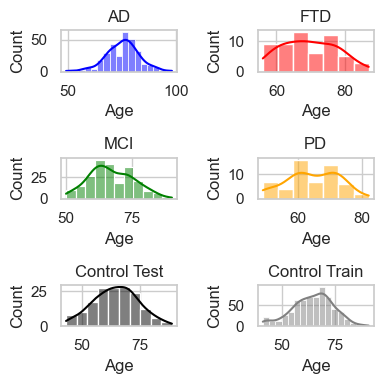

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los DataFrames
df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado = pd.read_excel(file_path_FTD)
df_MCI_filtrado = pd.read_excel(file_path_MCI)
df_PD_filtrado = pd.read_excel(file_path_PD)
df_control_train = xgb_model.X_train  # Grupo de control para entrenamiento
df_control_test = xgb_model.X_test  # Grupo de control para prueba

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear un subplot para cada DataFrame
fig, axes = plt.subplots(3, 2, figsize=(4, 4))

# Graficar la distribución de la edad para cada DataFrame
sns.histplot(df_AD_filtrado['Age'], ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('AD')
axes[0, 0].set_xlabel('Age')

sns.histplot(df_FTD_filtrado['Age'], ax=axes[0, 1], kde=True, color='red')
axes[0, 1].set_title('FTD')
axes[0, 1].set_xlabel('Age')

sns.histplot(df_MCI_filtrado['Age'], ax=axes[1, 0], kde=True, color='green')
axes[1, 0].set_title('MCI')
axes[1, 0].set_xlabel('Age')

sns.histplot(df_PD_filtrado['Age'], ax=axes[1, 1], kde=True, color='orange')
axes[1, 1].set_title('PD')
axes[1, 1].set_xlabel('Age')

sns.histplot(xgb_model.y_test, ax=axes[2, 0], kde=True, color='black')
axes[2, 0].set_title('Control Test')
axes[2, 0].set_xlabel('Age')

sns.histplot(xgb_model.y_train, ax=axes[2, 1], kde=True, color='gray')
axes[2, 1].set_title('Control Train')
axes[2, 1].set_xlabel('Age')

# Ajustar la disposición de los subplots
plt.tight_layout()
plt.show()


In [16]:
import pickle

In [17]:
with open(f'{path}Opt_Model/opt_XGB_model_40A.pickle', 'rb') as file:
    opt_xgb_40A= pickle.load(file)

In [18]:
errores = opt_xgb_40A.cv_results_['mean_test_score'][:100]

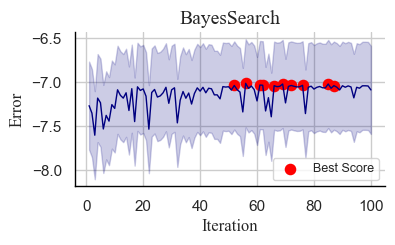

Top 1: Iteration 56, Score -7.014634330670039
Top 2: Iteration 69, Score -7.0224468789345185
Top 3: Iteration 85, Score -7.022498437563579
Top 4: Iteration 61, Score -7.034205054472655
Top 5: Iteration 62, Score -7.03698419411977
Top 6: Iteration 76, Score -7.037619199875072
Top 7: Iteration 52, Score -7.03915003709304
Top 8: Iteration 72, Score -7.039282055053955
Top 9: Iteration 87, Score -7.041247010934048
Top 10: Iteration 66, Score -7.04154234351256


In [19]:
Plotters.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [20]:
best_params_xgb = xgb_model.best_hyper(opt_model=opt_xgb_40A, num_max=100)

In [21]:
best_params_xgb

[{'colsample_bytree': 0.6,
  'learning_rate': 0.031011543328829893,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03371374196724646,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03092947827664299,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.033676334284894124,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.033342393223245836,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03131428589297841,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.047263658704671266,
  'max_depth': 9,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03373686268743549,
  'max_depth': 10,
  'n_est

In [22]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(params_=best_params_xgb[0])

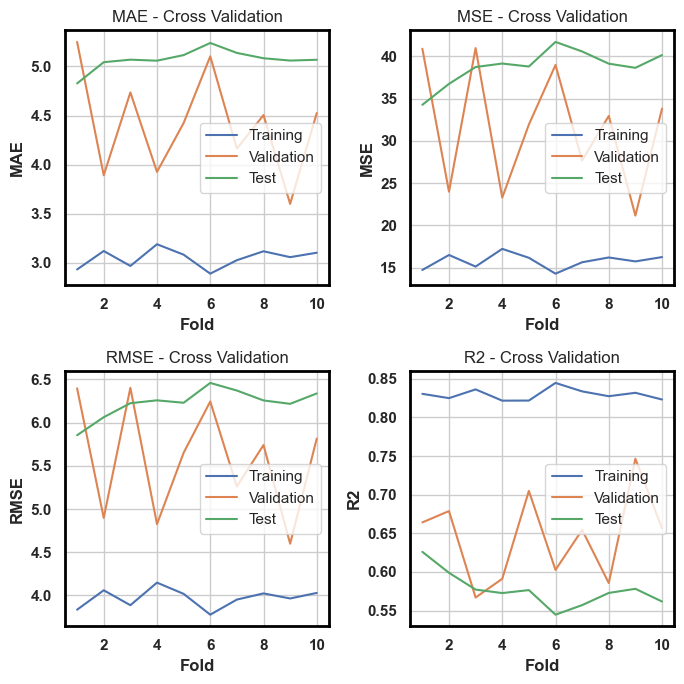

In [24]:
Plotters.plot_metricas_evaluacion(results)

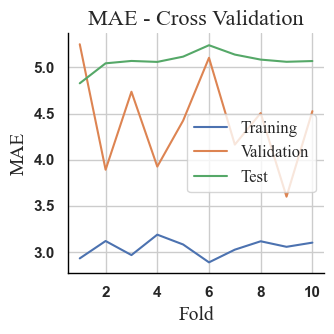

In [25]:
Plotters.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [26]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     275.8
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.22e-36
Time:                        21:29:37   Log-Likelihood:                -421.25
No. Observations:                 162   AIC:                             846.5
Df Residuals:                     160   BIC:                             852.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8198      1.760     20.349      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


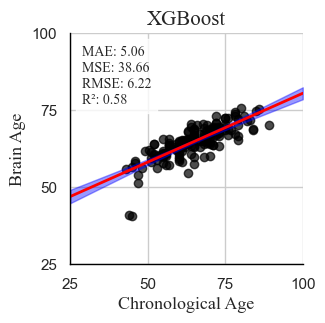

Error medio absoluto: 5.059243875366527
Error cuadrático medio: 38.65543481390099
Raíz del error cuadrático medio: 6.217349500703736
Coeficiente de determinación (R²): 0.5781939247001817


In [27]:
Plotters.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [28]:
y_pred_test_cn=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test, y_test=xgb_model.y_test)
y_pred_test_ad=xgb_model.predicter_corrected_2(X_test= X_AD_scaled, y_test=y_AD)
y_pred_test_ftd=xgb_model.predicter_corrected_2(X_test= X_FTD_scaled, y_test=y_FTD)
y_pred_test_mci=xgb_model.predicter_corrected_2(X_test= X_MCI_scaled, y_test=y_MCI)
y_pred_test_pd=xgb_model.predicter_corrected_2(X_test= X_PD_scaled, y_test=y_PD)


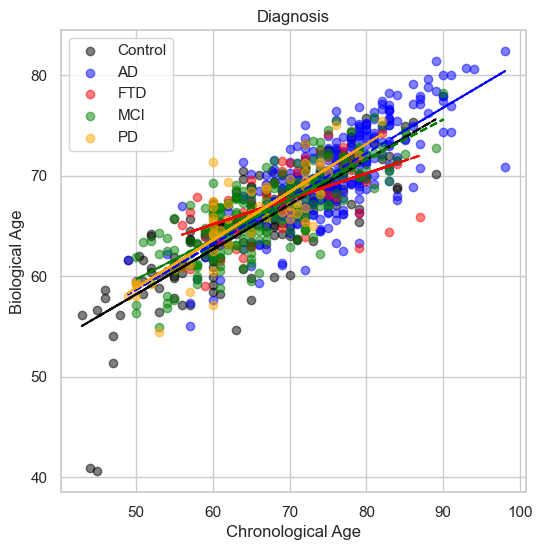

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred_test_cn, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green',)


# Graficar y ajustar la recta de PD
plt.scatter(y_PD, y_pred_test_pd, color='orange', label='PD', alpha=0.5)
plot_regression_line(y_PD, y_pred_test_pd, color='orange',)


# Añadir detalles
plt.xlabel('Chronological Age')
plt.ylabel('Biological Age')
plt.title('Diagnosis')
plt.legend()
#plt.xlim(30, 110)
#plt.ylim(30, 90)
plt.grid(True)

# Mostrar el gráfico
plt.show()


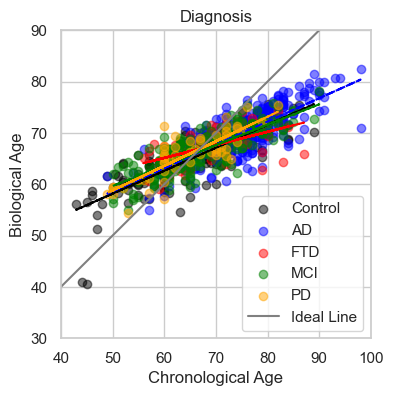

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, linestyle='--')

# Crear el gráfico
plt.figure(figsize=(4, 4))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred_test_cn, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green')

# Graficar y ajustar la recta de PD
plt.scatter(y_PD, y_pred_test_pd, color='orange', label='PD', alpha=0.5)
plot_regression_line(y_PD, y_pred_test_pd, color='orange')

# Graficar la línea de edad ideal
age_range = np.linspace(30, 110, 100)
plt.plot(age_range, age_range, color='gray', linestyle='-', label='Ideal Line')

# Añadir detalles
plt.xlabel('Chronological Age')
plt.ylabel('Biological Age')
plt.title('Diagnosis')
plt.legend()
plt.xlim(40, 100)
plt.ylim(30, 90)
plt.grid(True)

# Mostrar el gráfico
plt.show()


Gap

In [43]:
from sklearn.linear_model import LinearRegression

# Ajustar el modelo lineal al grupo de control
control_model = LinearRegression()
control_model.fit(y_pred_test_cn.reshape(-1, 1), xgb_model.y_test)


LinearRegression()

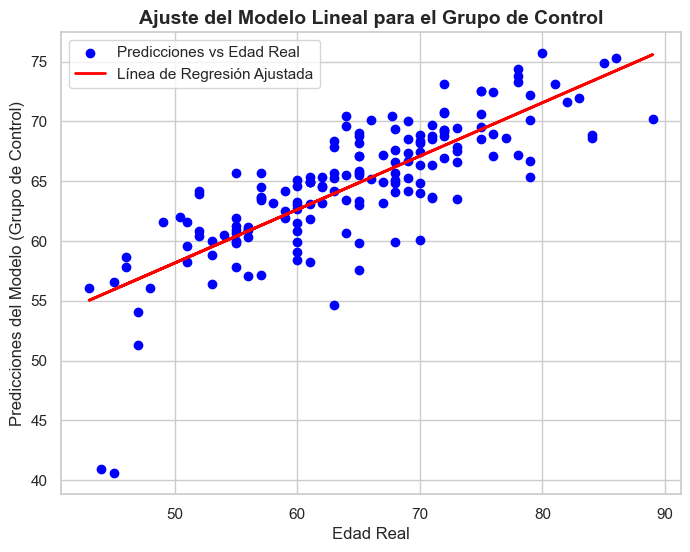

Pendiente (Coeficiente): 0.4469057828414361
Intercepto: 35.81984710568909


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convertir las Series a arrays de NumPy y ajustar el modelo lineal
y_test_array = xgb_model.y_test.values.reshape(-1, 1)  # Convertir a array NumPy y reescalar
y_pred_test_cn_array = y_pred_test_cn.reshape(-1, 1)  # Convertir a array NumPy y reescalar

# Ajustar el modelo lineal al grupo de control
control_model = LinearRegression()
control_model.fit(y_test_array,y_pred_test_cn.reshape(-1, 1))

# Predicciones del modelo ajustado para el grupo de control
y_pred_control_fit = control_model.predict(y_test_array)

# Crear el gráfico de la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(xgb_model.y_test, y_pred_test_cn, color='blue', label='Predicciones vs Edad Real')
plt.plot(xgb_model.y_test, y_pred_control_fit, color='red', linewidth=2, label='Línea de Regresión Ajustada')

plt.title('Ajuste del Modelo Lineal para el Grupo de Control', fontsize=14, fontweight='bold')
plt.xlabel('Edad Real', fontsize=12)
plt.ylabel('Predicciones del Modelo (Grupo de Control)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Obtener la pendiente (coeficiente) y el intercepto
coef = control_model.coef_
intercept = control_model.intercept_

print(f'Pendiente (Coeficiente): {coef[0][0]}')
print(f'Intercepto: {intercept[0]}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Convertir las Series a arrays de NumPy y ajustar el modelo lineal
y_test_array = xgb_model.y_test.values.reshape(-1, 1)  # Convertir a array NumPy y reescalar
y_pred_test_cn_array = y_pred_test_cn.reshape(-1, 1)  # Convertir a array NumPy y reescalar

# Ajustar el modelo lineal al grupo de control
control_model = LinearRegression()
control_model.fit(y_test_array, y_pred_test_cn_array)

# Predicciones del modelo ajustado para el grupo de control
y_pred_control_fit = control_model.predict(y_test_array)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_pred_test_cn_array, y_pred_control_fit)

print(f'Error Absoluto Medio (MAE): {mae}')

# Crear el gráfico de la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(xgb_model.y_test, y_pred_test_cn, color='blue', label='Predicciones vs Edad Real')
plt.plot(xgb_model.y_test, y_pred_control_fit, color='red', linewidth=2, label='Línea de Regresión Ajustada')

plt.title('Ajuste del Modelo Lineal para el Grupo de Control', fontsize=14, fontweight='bold')
plt.xlabel('Edad Real', fontsize=12)
plt.ylabel('Predicciones del Modelo (Grupo de Control)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Convertir las Series a arrays de NumPy y ajustar el modelo lineal
y_test_array = xgb_model.y_test.values.reshape(-1, 1)  # Convertir a array NumPy y reescalar
y_pred_test_cn_array = y_pred_test_cn.reshape(-1, 1)  # Convertir a array NumPy y reescalar

# Ajustar el modelo lineal al grupo de control
control_model = LinearRegression()
control_model.fit(y_test_array, y_pred_test_cn_array)

# Predicciones del modelo ajustado para el grupo de control
y_pred_control_fit = control_model.predict(y_test_array)

# Crear un modelo paralelo desplazado hacia abajo en 5 unidades
y_pred_test_cn_parallel = y_pred_test_cn_array - 5

# Ajustar el nuevo modelo (control_model_2) a los datos originales pero con las predicciones desplazadas
control_model_2 = LinearRegression()
control_model_2.fit(y_test_array, y_pred_test_cn_parallel)

# Predicciones del nuevo modelo ajustado
y_pred_control_2_fit = control_model_2.predict(y_test_array)

# Calcular el Error Absoluto Medio (MAE) para el modelo original
mae = mean_absolute_error(y_pred_test_cn_array, y_pred_control_fit)
print(f'Error Absoluto Medio (MAE) para control_model: {mae}')

# Crear el gráfico con ambos modelos
plt.figure(figsize=(8, 6))
plt.scatter(xgb_model.y_test, y_pred_test_cn, color='blue', label='Predicciones vs Edad Real')
plt.plot(xgb_model.y_test, y_pred_control_fit, color='red', linewidth=2, label='Línea de Regresión Ajustada (control_model)')
plt.plot(xgb_model.y_test, y_pred_control_2_fit, color='green', linestyle='--', linewidth=2, label='Línea de Regresión Ajustada (control_model_2)')

plt.title('Ajuste del Modelo Lineal y Paralelo para el Grupo de Control', fontsize=14, fontweight='bold')
plt.xlabel('Edad Real', fontsize=12)
plt.ylabel('Predicciones del Modelo (Grupo de Control)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Evaluar el error para el grupo AD
y_ad_pred_control = control_model.predict(y_AD.values.reshape(-1, 1))
error_ad =   y_ad_pred_control.flatten() - y_pred_test_ad 
error_ad_abs = np.abs(y_pred_test_ad - y_ad_pred_control.flatten()  )
error_ad_0 =   y_AD - y_pred_test_ad 
error_ad_abs_0 = np.abs(y_pred_test_ad - y_AD.values  )

# Evaluar el error para el grupo FTD
y_ftd_pred_control = control_model.predict(y_FTD.values.reshape(-1, 1))
error_ftd = y_ftd_pred_control.flatten() - y_pred_test_ftd 
error_ftd_abs = np.abs(y_pred_test_ftd - y_ftd_pred_control.flatten() )
error_ftd_0 =  y_FTD - y_pred_test_ftd 
error_ftd_abs_0 = np.abs(y_pred_test_ftd - y_FTD.values )


# Evaluar el error para el grupo MCI
y_mci_pred_control = control_model.predict(y_MCI.values.reshape(-1, 1))
error_mci =    y_mci_pred_control.flatten() - y_pred_test_mci 
error_mci_abs = np.abs(y_pred_test_mci - y_mci_pred_control.flatten() )
error_mci_0 =  y_MCI - y_pred_test_mci 
error_mci_abs_0 = np.abs(y_pred_test_mci - y_MCI.values )

# Evaluar el error para el grupo PD
y_pd_pred_control = control_model.predict(y_PD.values.reshape(-1, 1))
error_pd =   y_pd_pred_control.flatten() - y_pred_test_pd 
error_pd_abs = np.abs(y_pred_test_pd - y_pd_pred_control.flatten() )
error_pd_0 =  y_PD - y_pred_test_pd 
error_pd_abs_0 = np.abs(y_pred_test_pd - y_PD.values )

# Evaluar el error para el grupo Control
y_cn_pred_control = control_model.predict(xgb_model.y_test.values.reshape(-1, 1))
error_cn =  y_cn_pred_control.flatten() - y_pred_test_cn 
error_cn_abs = np.abs(y_pred_test_cn - y_cn_pred_control.flatten() )
error_cn_0 = xgb_model.y_test  - y_pred_test_cn 
error_cn_abs_0 = np.abs(y_pred_test_cn - xgb_model.y_test)


C:\Users\felipe\AppData\Local\Temp\ipykernel_7884\705019583.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)


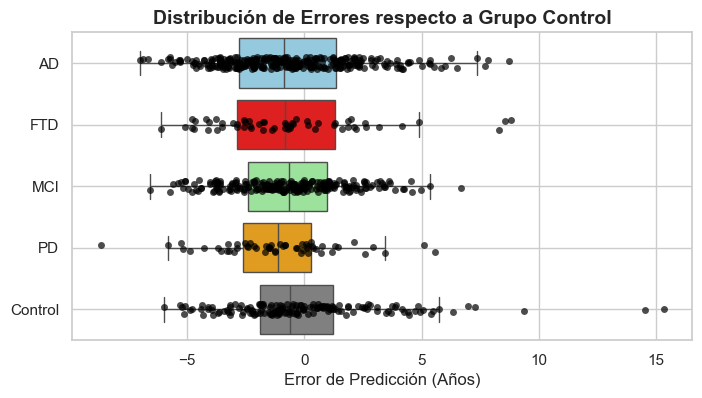

In [72]:

# Crear un DataFrame en formato largo para los errores
data = {
    'Error': np.concatenate([error_ad, error_ftd, error_mci, error_pd, error_cn]),
    'Grupo': ['AD'] * len(error_ad) + ['FTD'] * len(error_ftd) + ['MCI'] * len(error_mci) + ['PD'] * len(error_pd) + ['Control'] * len(error_cn)
}


df_errors = pd.DataFrame(data)

colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'Control': 'gray'
}


# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error', data=df_errors, color='black', size=5,alpha=0.7, jitter=True)

plt.title('Distribución de Errores respecto a Grupo Control', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('Error de Predicción (Años)', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_7884\2034022653.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, showfliers=False, palette=colores_personalizados)


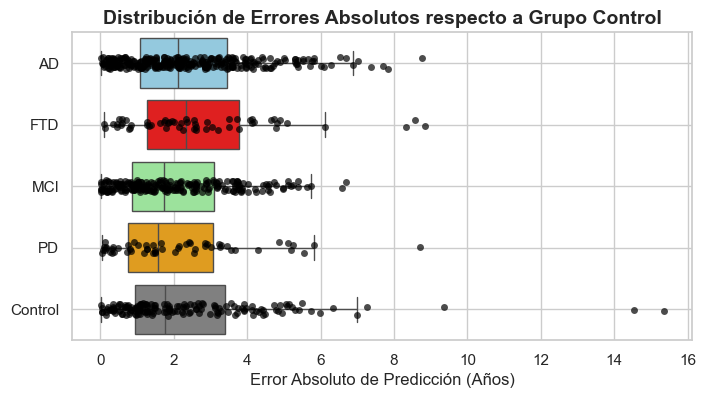

In [70]:
# Crear un DataFrame en formato largo para los errores absolutos
data = {
    'Error Absoluto': np.concatenate([error_ad_abs, error_ftd_abs, error_mci_abs, error_pd_abs, error_cn_abs]),
    'Grupo': ['AD'] * len(error_ad_abs) + ['FTD'] * len(error_ftd_abs) + ['MCI'] * len(error_mci_abs) + ['PD'] * len(error_pd_abs) + ['Control'] * len(error_cn_abs)
}

df_errors_abs = pd.DataFrame(data)

colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'Control': 'gray'
}

# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, color='black', size=5,alpha=0.7, jitter=True)

plt.title('Distribución de Errores Absolutos respecto a Grupo Control', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('Error Absoluto de Predicción (Años)', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_7884\99420997.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)


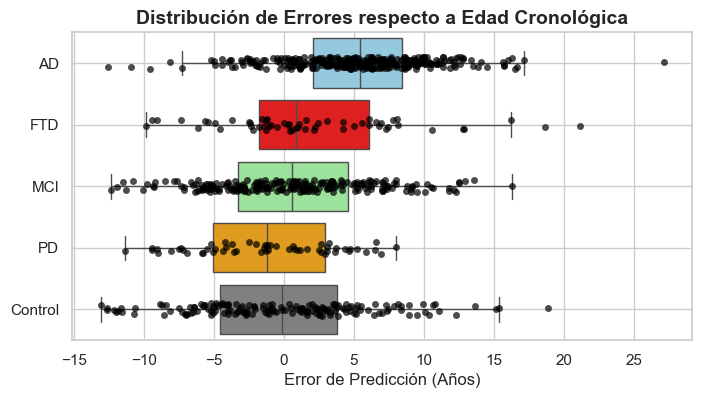

In [71]:
# Crear un DataFrame en formato largo para los errores
data = {
    'Error': np.concatenate([error_ad_0, error_ftd_0, error_mci_0, error_pd_0, error_cn_0]),
    'Grupo': ['AD'] * len(error_ad_0) + ['FTD'] * len(error_ftd_0) + ['MCI'] * len(error_mci_0) + ['PD'] * len(error_pd_0) + ['Control'] * len(error_cn_0)
}

df_errors = pd.DataFrame(data)

# Definir los colores para cada grupo
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'Control': 'gray'
}

# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error', data=df_errors, color='black', size=5, alpha=0.7, jitter=True)

plt.title('Distribución de Errores respecto a Edad Cronológica', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('Error de Predicción (Años)', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\felipe\AppData\Local\Temp\ipykernel_7884\441534533.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, showfliers=False, palette=colores_personalizados)


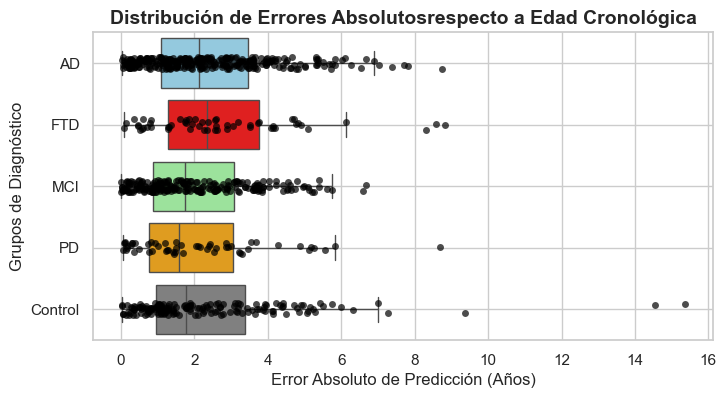

In [67]:
# Crear un DataFrame en formato largo para los errores absolutos
data = {
    'Error Absoluto': np.concatenate([error_ad_abs, error_ftd_abs, error_mci_abs, error_pd_abs, error_cn_abs]),
    'Grupo': ['AD'] * len(error_ad_abs) + ['FTD'] * len(error_ftd_abs) + ['MCI'] * len(error_mci_abs) + ['PD'] * len(error_pd_abs) + ['Control'] * len(error_cn_abs)
}

df_errors_abs = pd.DataFrame(data)

colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'Control': 'gray'
}

# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, color='black', size=5,alpha=0.7, jitter=True)

plt.title('Distribución de Errores Absolutosrespecto a Edad Cronológica', fontsize=14, fontweight='bold')
plt.ylabel('Grupos de Diagnóstico', fontsize=12)
plt.xlabel('Error Absoluto de Predicción (Años)', fontsize=12)
plt.grid(True)
plt.show()


# Invento

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Evaluar el error para el grupo AD
y_ad_pred_control = control_model_2.predict(y_AD.values.reshape(-1, 1))
error_ad =   y_ad_pred_control.flatten() - y_pred_test_ad 
error_ad_abs = np.abs(y_pred_test_ad - y_ad_pred_control.flatten()  )
error_ad_0 =   y_AD - y_pred_test_ad 
error_ad_abs_0 = np.abs(y_pred_test_ad - y_AD.values  )

# Evaluar el error para el grupo FTD
y_ftd_pred_control = control_model_2.predict(y_FTD.values.reshape(-1, 1))
error_ftd = y_ftd_pred_control.flatten() - y_pred_test_ftd 
error_ftd_abs = np.abs(y_pred_test_ftd - y_ftd_pred_control.flatten() )
error_ftd_0 =  y_FTD - y_pred_test_ftd 
error_ftd_abs_0 = np.abs(y_pred_test_ftd - y_FTD.values )


# Evaluar el error para el grupo MCI
y_mci_pred_control = control_model_2.predict(y_MCI.values.reshape(-1, 1))
error_mci =    y_mci_pred_control.flatten() -y_pred_test_mci 
error_mci_abs = np.abs(y_pred_test_mci - y_mci_pred_control.flatten() )
error_mci_0 =  y_MCI - y_pred_test_mci 
error_mci_abs_0 = np.abs(y_pred_test_mci - y_MCI.values )

# Evaluar el error para el grupo PD
y_pd_pred_control = control_model_2.predict(y_PD.values.reshape(-1, 1))
error_pd =   y_pd_pred_control.flatten() - y_pred_test_pd 
error_pd_abs = np.abs(y_pred_test_pd - y_pd_pred_control.flatten() )
error_pd_0 =  y_PD - y_pred_test_pd 
error_pd_abs_0 = np.abs(y_pred_test_pd - y_PD.values )

# Evaluar el error para el grupo Control
y_cn_pred_control = control_model_2.predict(xgb_model.y_test.values.reshape(-1, 1))
error_cn =  y_cn_pred_control.flatten() - y_pred_test_cn 
error_cn_abs = np.abs(y_pred_test_cn - y_cn_pred_control.flatten() )
error_cn_0 = xgb_model.y_test  - y_pred_test_cn 
error_cn_abs_0 = np.abs(y_pred_test_cn - xgb_model.y_test)


C:\Users\felipe\AppData\Local\Temp\ipykernel_2684\1446599644.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)


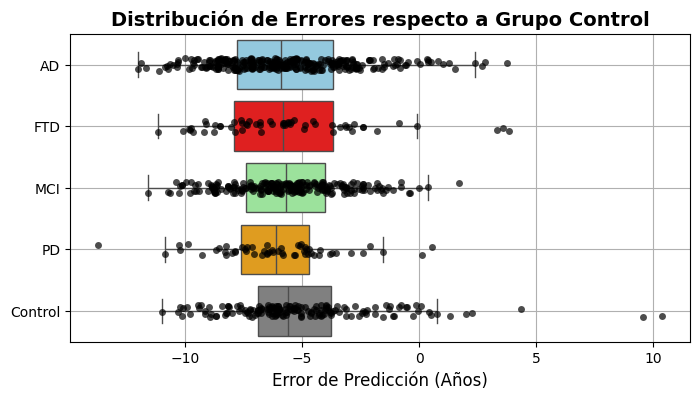

In [191]:

# Crear un DataFrame en formato largo para los errores
data = {
    'Error': np.concatenate([error_ad, error_ftd, error_mci, error_pd, error_cn]),
    'Grupo': ['AD'] * len(error_ad) + ['FTD'] * len(error_ftd) + ['MCI'] * len(error_mci) + ['PD'] * len(error_pd) + ['Control'] * len(error_cn)
}


df_errors = pd.DataFrame(data)

colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'Control': 'gray'
}

# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error', data=df_errors, color='black', size=5,alpha=0.7, jitter=True)

plt.title('Distribución de Errores respecto a Grupo Control', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('Error de Predicción (Años)', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_2684\2034022653.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, showfliers=False, palette=colores_personalizados)


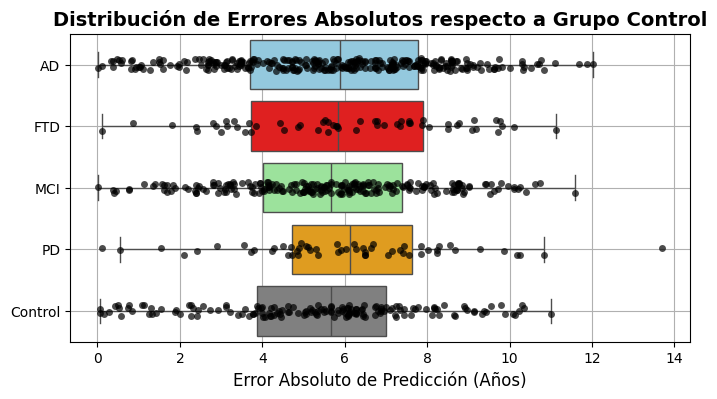

In [192]:
# Crear un DataFrame en formato largo para los errores absolutos
data = {
    'Error Absoluto': np.concatenate([error_ad_abs, error_ftd_abs, error_mci_abs, error_pd_abs, error_cn_abs]),
    'Grupo': ['AD'] * len(error_ad_abs) + ['FTD'] * len(error_ftd_abs) + ['MCI'] * len(error_mci_abs) + ['PD'] * len(error_pd_abs) + ['Control'] * len(error_cn_abs)
}

df_errors_abs = pd.DataFrame(data)

colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'Control': 'gray'
}

# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error Absoluto', data=df_errors_abs, color='black', size=5,alpha=0.7, jitter=True)

plt.title('Distribución de Errores Absolutos respecto a Grupo Control', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('Error Absoluto de Predicción (Años)', fontsize=12)
plt.grid(True)
plt.show()


# Mayores a 20 Años

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_name = 'dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
file_path_AD = f'{path}df_AD_filtrado.xlsx'
file_path_FTD = f'{path}df_FTD_filtrado.xlsx'
file_path_MCI = f'{path}df_MCI_filtrado.xlsx'
file_path_PD = f'{path}df_PD_filtrado.xlsx'

df = pd.read_excel(file_path)
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)

df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado=pd.read_excel(file_path_FTD)
df_MCI_filtrado=pd.read_excel(file_path_MCI)
df_PD_filtrado=pd.read_excel(file_path_PD)

X_CN = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
X_AD = df_AD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_FTD = df_FTD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_MCI = df_MCI_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_PD = df_PD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])

# Combina X_CN y X_AD
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI], axis=0).reset_index(drop=True)

# Inicializa y ajusta el MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_combined)

# Aplica la transformación a X_CN y X_AD
X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)

# Opcional: convierte los resultados escalados de nuevo a DataFrames si lo prefieres
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)

y = df_filtrado["Age"]
y_AD = df_AD_filtrado["Age"]
y_FTD = df_FTD_filtrado["Age"]
y_MCI = df_MCI_filtrado["Age"]



In [30]:
xgb_model = XGBoostRegressor()
xgb_model.set_data(X_CN_scaled,y,preprocess=False)


In [24]:
with open(f'{path}Opt_Model/opt_XGB_model_400iter.pickle', 'rb') as file:
    opt_xgb= pickle.load(file)

In [25]:
best_params_xgb = xgb_model.best_hyper(opt_model=opt_xgb, num_max=100)

In [31]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 10,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": False
            }

In [ ]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(params_=best_params_xgb[0])

In [33]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     836.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.20e-85
Time:                        15:41:05   Log-Likelihood:                -993.57
No. Observations:                 276   AIC:                             1991.
Df Residuals:                     274   BIC:                             1998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9608      1.368      8.744      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


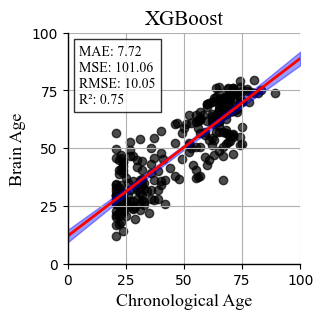

Error medio absoluto: 7.723095679810836
Error cuadrático medio: 101.0642055942063
Raíz del error cuadrático medio: 10.053069461324053
Coeficiente de determinación (R²): 0.7502782711878307


In [34]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [35]:
y_pred_test_ad=xgb_model.predicter_corrected_2(X_test= X_AD_scaled, y_test=y_AD)
y_pred_test_ftd=xgb_model.predicter_corrected_2(X_test= X_FTD_scaled, y_test=y_FTD)
y_pred_test_mci=xgb_model.predicter_corrected_2(X_test= X_MCI_scaled, y_test=y_MCI)


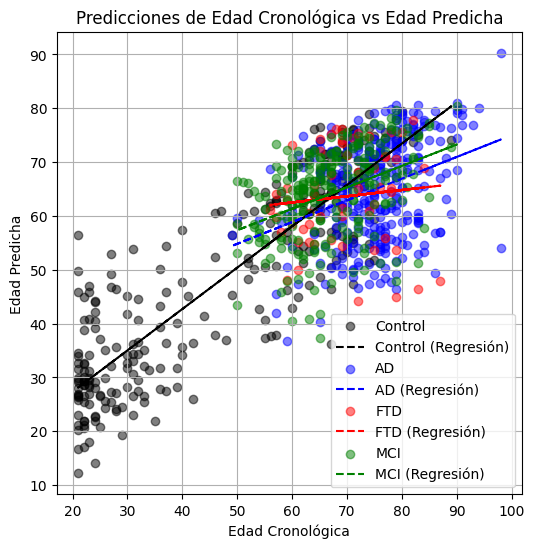

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color, label):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, label=f'{label} (Regresión)', linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black', label='Control')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue', label='AD')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red', label='FTD')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green', label='MCI')


# Añadir detalles
plt.xlabel('Edad Cronológica')
plt.ylabel('Edad Predicha')
plt.title('Predicciones de Edad Cronológica vs Edad Predicha')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [45]:
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)
X_CN = df_filtrado.drop(columns=["Unnamed: 0", "Age"])

X_CN_scaled = scaler.transform(X_CN)
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

y = df_filtrado["Age"]



In [46]:
xgb_model.set_data(X_CN_scaled,y,preprocess=False)

In [47]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     180.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           4.63e-28
Time:                        15:45:28   Log-Likelihood:                -553.73
No. Observations:                 162   AIC:                             1111.
Df Residuals:                     160   BIC:                             1118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4217      3.988      2.613      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


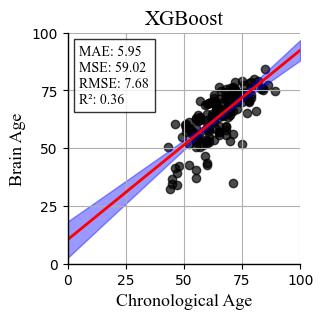

Error medio absoluto: 5.950806655370105
Error cuadrático medio: 59.01896912244261
Raíz del error cuadrático medio: 7.682380433332016
Coeficiente de determinación (R²): 0.3559881073999386


In [48]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [49]:
y_pred_test_ad=xgb_model.predicter_corrected_2(X_test= X_AD_scaled, y_test=y_AD)
y_pred_test_ftd=xgb_model.predicter_corrected_2(X_test= X_FTD_scaled, y_test=y_FTD)
y_pred_test_mci=xgb_model.predicter_corrected_2(X_test= X_MCI_scaled, y_test=y_MCI)


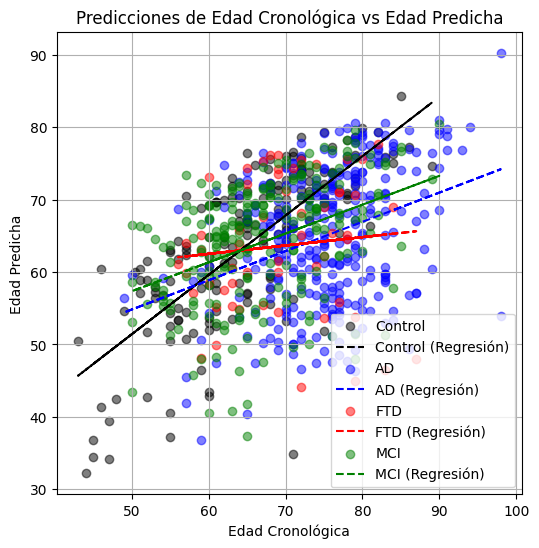

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color, label):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, label=f'{label} (Regresión)', linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black', label='Control')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue', label='AD')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red', label='FTD')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green', label='MCI')


# Añadir detalles
plt.xlabel('Edad Cronológica')
plt.ylabel('Edad Predicha')
plt.title('Predicciones de Edad Cronológica vs Edad Predicha')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Top 20

In [27]:
xgb_model = XGBoostRegressor()
xgb_model.set_data(X_CN_scaled,y, preprocess=False)

In [9]:
with open(f'{path}Opt_Model/opt_XGB_model_40A_top20.pickle', 'rb') as file:
    opt_xgb_40A_top20= pickle.load(file)

In [10]:
errores = opt_xgb_40A_top20.cv_results_['mean_test_score'][:100]

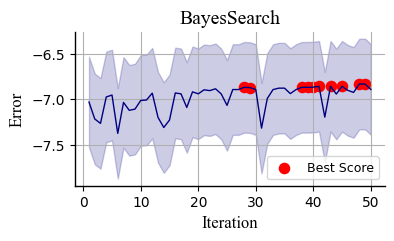

Top 1: Iteration 49, Score -6.831900166487083
Top 2: Iteration 48, Score -6.831900195830907
Top 3: Iteration 43, Score -6.856505193740894
Top 4: Iteration 45, Score -6.856857624848684
Top 5: Iteration 41, Score -6.8574269590928
Top 6: Iteration 40, Score -6.866131602892509
Top 7: Iteration 39, Score -6.867924723258386
Top 8: Iteration 28, Score -6.867924865484238
Top 9: Iteration 38, Score -6.867925187624418
Top 10: Iteration 29, Score -6.8710429588342326


In [18]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [19]:
best_params_xgb_top20 = xgb_model.best_hyper(opt_xgb_40A_top20)

In [ ]:
best_params_xgb_top20

In [21]:
with open(f'{path}Opt_Model_2/shap_summary_sorted_xgb.pickle', 'rb') as file:
    shap_summary_sorted= pickle.load(file)

In [23]:
top_20_features = [feature[0] for feature in shap_summary_sorted[:20]]

In [32]:
X_train_top20 = xgb_model.X_train[top_20_features]
X_test_top20 = xgb_model.X_test[top_20_features]  

In [30]:
X_AD_scaled_top20 = X_AD_scaled[top_20_features]
X_FTD_scaled_top20 = X_FTD_scaled[top_20_features]
X_MCI_scaled_top20 = X_MCI_scaled[top_20_features]

In [78]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 20,
                "eval_metric": "mae",
                "eval_set": [(X_CN_scaled[top_20_features], y)],
                "verbose": True
            }

In [62]:
xgb_model.fit_params_train = {}

In [ ]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(X_train=X_train_top20,X_test=X_test_top20,params_=best_params_xgb_top20[0])

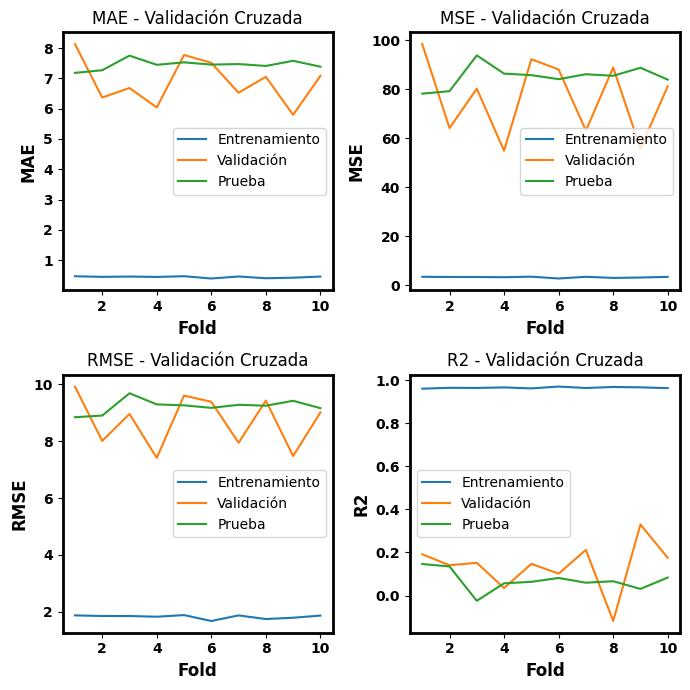

In [71]:
Plotter.plot_metricas_evaluacion(results)

In [72]:
y_pred=xgb_model.predicter_corrected_2(X_test= X_test_top20)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     21.76
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           6.48e-06
Time:                        13:18:58   Log-Likelihood:                -514.12
No. Observations:                 162   AIC:                             1032.
Df Residuals:                     160   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2263      3.123     16.083      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


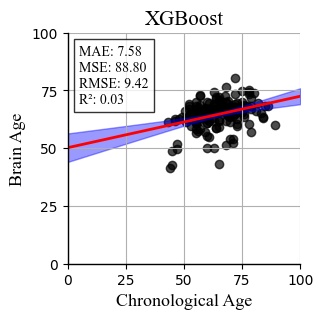

Error medio absoluto: 7.5829739179650435
Error cuadrático medio: 88.79507081498068
Raíz del error cuadrático medio: 9.423113647567915
Coeficiente de determinación (R²): 0.03107284896023499


In [73]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [74]:
y_pred_test_ad=xgb_model.predicter_corrected_2(X_test= X_AD_scaled_top20, y_test=y_AD)
y_pred_test_ftd=xgb_model.predicter_corrected_2(X_test= X_FTD_scaled_top20, y_test=y_FTD)
y_pred_test_mci=xgb_model.predicter_corrected_2(X_test= X_MCI_scaled_top20, y_test=y_MCI)


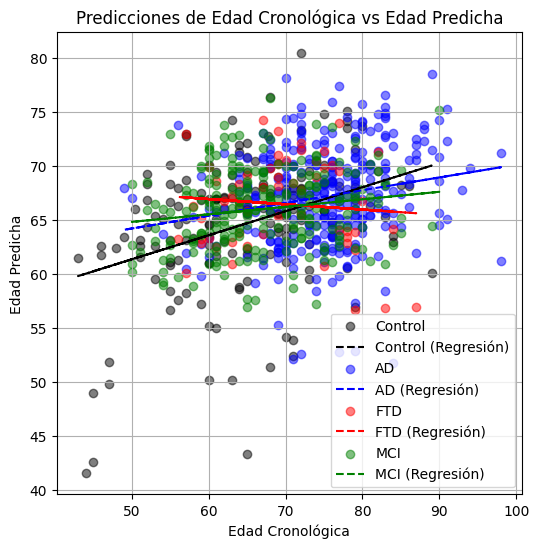

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color, label):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, label=f'{label} (Regresión)', linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(xgb_model.y_test, y_pred, color='black', label='Control', alpha=0.5)
plot_regression_line(xgb_model.y_test, y_pred, color='black', label='Control')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue', label='AD')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red', label='FTD')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green', label='MCI')


# Añadir detalles
plt.xlabel('Edad Cronológica')
plt.ylabel('Edad Predicha')
plt.title('Predicciones de Edad Cronológica vs Edad Predicha')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
